In [1]:
import os
import sys
path = os.path.dirname(os.getcwd())
new_path = os.path.join(path, 'src')
sys.path.insert(0,new_path)
import cmath
import math

import pandas as pd
import numpy as np                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     

from constants import FilePath,Channel,Tube

from pathlib import Path

from sklearn.feature_selection import mutual_info_regression
import features.build_features as feat

from tqdm import tqdm

## Running some initial tests to detect what may be usefull features

In [2]:
filename = os.path.join(path, 'data', 'complete_raw','filtered_data.csv')
data= pd.read_csv(filename)


In [3]:
#select data for some first test - round pits medium size angle 0
RP03A = data[(data.Tube_Alias=='RP03') & (data.Flaw_ID.isin(['A'])) & 
                 (data.Angle == 0)].reset_index()
RP03B = data[(data.Tube_Alias=='RP03') & (data.Flaw_ID.isin(['B'])) & 
                 (data.Angle == 0)].reset_index()
RP03C = data[(data.Tube_Alias=='RP03') & (data.Flaw_ID.isin(['C'])) & 
                 (data.Angle == 0)].reset_index()
RP03D = data[(data.Tube_Alias=='RP03') & (data.Flaw_ID.isin(['D'])) & 
                 (data.Angle == 0)].reset_index()
RP03E= data[(data.Tube_Alias=='RP03') & (data.Flaw_ID.isin(['E'])) & 
                (data.Angle == 0)].reset_index()
RP03F = data[(data.Tube_Alias=='RP03') & (data.Flaw_ID.isin(['F'])) & 
                 (data.Angle == 0)].reset_index()
RP03G = data[(data.Tube_Alias=='RP03') & (data.Flaw_ID.isin(['G'])) & 
                 (data.Angle == 0)].reset_index()
RP03H= data[(data.Tube_Alias=='RP03') & (data.Flaw_ID.isin(['H'])) & 
                (data.Angle == 0)].reset_index()
RP03I= data[(data.Tube_Alias=='RP03') & (data.Flaw_ID.isin(['I'])) & 
                (data.Angle == 0)].reset_index()

RP05A = data[(data.Tube_Alias=='RP05') & (data.Flaw_ID.isin(['A'])) & 
                 (data.Angle == 0)].reset_index()
RP05B = data[(data.Tube_Alias=='RP05') & (data.Flaw_ID.isin(['B'])) & 
                 (data.Angle == 0)].reset_index()
RP05C = data[(data.Tube_Alias=='RP05') & (data.Flaw_ID.isin(['C'])) & 
                 (data.Angle == 0)].reset_index()
RP05D = data[(data.Tube_Alias=='RP05') & (data.Flaw_ID.isin(['D'])) & 
                 (data.Angle == 0)].reset_index()
RP05E= data[(data.Tube_Alias=='RP05') & (data.Flaw_ID.isin(['E'])) & 
                (data.Angle == 0)].reset_index()
RP05F = data[(data.Tube_Alias=='RP05') & (data.Flaw_ID.isin(['F'])) & 
                 (data.Angle == 0)].reset_index()
RP05G = data[(data.Tube_Alias=='RP05') & (data.Flaw_ID.isin(['G'])) & 
                 (data.Angle == 0)].reset_index()
RP05H= data[(data.Tube_Alias=='RP05') & (data.Flaw_ID.isin(['H'])) & 
                (data.Angle == 0)].reset_index()
RP05I= data[(data.Tube_Alias=='RP05') & (data.Flaw_ID.isin(['I'])) & 
                (data.Angle == 0)].reset_index()



In [4]:
DIFF_REAL=np.intersect1d(Channel.DIFF, Channel.REAL)
DIFF_IMAG=np.intersect1d(Channel.DIFF, Channel.IMAGINARY)
ABS_REAL=np.intersect1d(Channel.ABS, Channel.REAL)
ABS_IMAG=np.intersect1d(Channel.ABS, Channel.IMAGINARY)

In [5]:
samples=[ RP03A,RP03B,RP03C,RP03D,RP03E,RP03F,RP03G,RP03H,RP03I,
          RP03A,RP05B,RP05C,RP05D,RP05E,RP05F,RP05G,RP05H,RP05I ]

x11 = RP05B[DIFF_REAL].to_numpy()

i11 = RP05B['Y11'].to_numpy().reshape(-1,)
r11 = RP05B['X11'].to_numpy().reshape(-1,)
i12 = RP05B['Y12'].to_numpy().reshape(-1,)
r12 = RP05B['X12'].to_numpy().reshape(-1,)
mi_i11 = mutual_info_regression(x11, i11)
mi_r11 = mutual_info_regression(x11, r11)
mi_i12 = mutual_info_regression(x11, i12)
mi_r12 = mutual_info_regression(x11, r12)

In [6]:
x11h = RP05H[DIFF_REAL].to_numpy()
i11h = RP05H['Y11'].to_numpy().reshape(-1,)
r11h = RP05H['X11'].to_numpy().reshape(-1,)
i12h = RP05H['Y12'].to_numpy().reshape(-1,)
r12h = RP05H['X12'].to_numpy().reshape(-1,)
mi_i11h = mutual_info_regression(x11h, i11h)
mi_r11h = mutual_info_regression(x11h, r11h)
mi_i12h = mutual_info_regression(x11h, i12h)
mi_r12h = mutual_info_regression(x11h, r12h)



No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

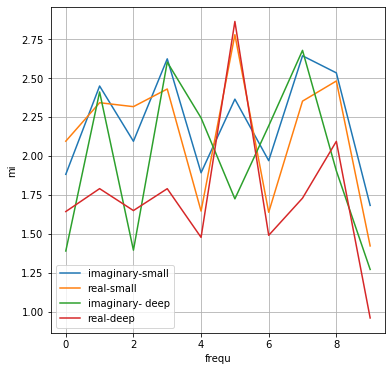

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(6,6))

ax.set(xlabel='frequ', ylabel='mi')
ax.legend()
ax.grid(True)

ax.plot(mi_i11,label='imaginary-small')
ax.plot(mi_r11,label='real-small')

ax.plot(mi_i11h,label='imaginary- deep')
ax.plot(mi_r11h,label='real-deep')

ax.legend()
plt.show

## Creating Mutual Information Features

Calculating mutual information for pairs of  prime, low and high frequencies

In [8]:
channels=['X11','Y11','X12','Y12','X17','Y17','X18','Y18','X03','Y03','X04','Y04']

headers =['midr_X11','midr_Y11','midr_X12','midr_Y12','midr_X17','midr_Y17','midr_X18',
          'midr_Y18','midr_X03','midr_Y03','midr_X04','midr_Y04',
          'midi_X11','midi_Y11','midi_X12','midi_Y12','midi_X17','midi_Y17','midi_X18',
          'midi_Y18','midi_X03','midi_Y03','midi_X04','midi_Y04',
          'miar_X11','miar_Y11','miar_X12','miar_Y12','miar_X17','miar_Y17','miar_X18',
          'miar_Y18','miar_X03','miar_Y03','miar_X04','miar_Y04',
          'miai_X11','miai_Y11','miai_X12','miai_Y12','miai_X17','miai_Y17','miai_X18',
          'miai_Y18','miai_X03','miai_Y03','miai_X04','miai_Y04',
         ]

id_df = pd.DataFrame([k for k,g in data.groupby(['Tube_Alias', 'Flaw_ID', 'Angle'])],columns= ['Tube_Alias','Flaw_ID','Angle'])

#### Calculate mutual information dataframe
mutual information features are calculated for the whole dataset. Be aware that this is a slow process
that may take 1-2 hours. 
The dataframes are saved as csv files. If you have already calculated them, move to the next section where they are loaded from file. 

In [ ]:
#calculting the dataframe for 
abs_mi =  [feat.calc_frequency_mutual_info(g, channels) for k,g in tqdm(data.groupby(['Tube_Alias', 'Flaw_ID', 'Angle']))]
mi_df=pd.DataFrame(abs_mi) 
mi_df.columns=headers
# add id dataframe     
mi_df=pd.merge(id_df, mi_df, left_index=True, right_index=True)
# add the flaw info to the dataframe     
mi_df['Flaw_Depth'],mi_df['Pct_Depth'], mi_df['Flaw_Volume'], mi_df['Flaw_Area'] = feat.add_flaw_info_to_df(mi_df['Flaw_ID'], mi_df['Tube_Alias']) 
#write to file
mi_df.to_csv(os.path.join(path, 'data', 'interim','mutual_information.csv'), index=False)

In [14]:
#calculting mutual information features based on normalized mi - this is noise sensitive and may cells
#for some waveforms
norm_mi =  [feat.calc_frequency_norm_mutual_info(g, channels) for k,g in tqdm(data.groupby(['Tube_Alias', 'Flaw_ID', 'Angle']))]
mi_df_n=pd.DataFrame(norm_mi) 
mi_df_n.columns=headers
#adding id and tube info
mi_df_n=pd.merge(id_df, mi_df_n, left_index=True, right_index=True)
mi_df_n['Flaw_Depth'],mi_df_n['Pct_Depth'], mi_df_n['Flaw_Volume'], mi_df_n['Flaw_Area'] = feat.add_flaw_info_to_df(mi_df_n['Flaw_ID'], mi_df_n['Tube_Alias'])
#write to file and check
mi_df_n.to_csv(os.path.join(path, 'data', 'interim','mutual_information_norm.csv'), index=False)
mi_df_n.head()

  1%|▍                                                                             | 35/5868 [00:26<1:15:25,  1.29it/s]C:\Users\gmueller\Documents\GitHub\epri_Mar20\src\features\build_features.py:222: RuntimeWarning: invalid value encountered in true_divide
  mi_di.append(mi/np.max(mi))
  6%|████▍                                                                        | 334/5868 [04:38<1:10:10,  1.31it/s]C:\Users\gmueller\Documents\GitHub\epri_Mar20\src\features\build_features.py:220: RuntimeWarning: invalid value encountered in true_divide
  mi_dr.append(mi/np.max(mi))
  6%|████▌                                                                        | 345/5868 [05:06<9:04:55,  5.92s/it]C:\Users\gmueller\Documents\GitHub\epri_Mar20\src\features\build_features.py:222: RuntimeWarning: invalid value encountered in true_divide
  mi_di.append(mi/np.max(mi))
 10%|████████                                                                     | 614/5868 [09:11<1:08:36,  1.28it/s]C:\Users\gmueller

 89%|███████████████████████████████████████████████████████████████████▊        | 5238/5868 [1:16:43<07:44,  1.36it/s]C:\Users\gmueller\Documents\GitHub\epri_Mar20\src\features\build_features.py:220: RuntimeWarning: invalid value encountered in true_divide
  mi_dr.append(mi/np.max(mi))
 89%|███████████████████████████████████████████████████████████████████▊        | 5239/5868 [1:16:44<07:38,  1.37it/s]C:\Users\gmueller\Documents\GitHub\epri_Mar20\src\features\build_features.py:222: RuntimeWarning: invalid value encountered in true_divide
  mi_di.append(mi/np.max(mi))
 89%|███████████████████████████████████████████████████████████████████▉        | 5241/5868 [1:16:45<07:25,  1.41it/s]C:\Users\gmueller\Documents\GitHub\epri_Mar20\src\features\build_features.py:222: RuntimeWarning: invalid value encountered in true_divide
  mi_di.append(mi/np.max(mi))
 90%|████████████████████████████████████████████████████████████████████        | 5256/5868 [1:16:56<07:37,  1.34it/s]C:\Users\gmueller

,Tube_Alias,Flaw_ID,Angle,midr_X11,midr_Y11,midr_X12,midr_Y12,midr_X17,midr_Y17,midr_X18,...,miai_X18,miai_Y18,miai_X03,miai_Y03,miai_X04,miai_Y04,Flaw_Depth,Pct_Depth,Flaw_Volume,Flaw_Area
0,AP01,A,0,0.755037,0.885631,0.782926,0.892943,0.787320,0.621174,0.914586,...,0.358179,0.076547,0.199536,0.230174,0.475459,0.288000,0.076,10.3,0.864,11.3288
1,AP01,A,10,0.786983,0.871338,0.847970,0.909927,0.822847,0.614223,0.823868,...,0.341712,0.075704,0.368157,0.357667,0.496198,0.308234,0.076,10.3,0.864,11.3288
2,AP01,A,20,0.818188,0.868434,0.938843,0.942907,0.827496,0.738412,0.846685,...,0.238844,0.055989,0.140061,0.131139,0.330209,0.283338,0.076,10.3,0.864,11.3288
3,AP01,A,30,0.816802,0.862469,0.799610,0.921743,0.829342,0.617687,0.744201,...,0.389720,0.097218,0.108769,0.201471,0.456386,0.338983,0.076,10.3,0.864,11.3288
4,AP01,A,40,0.817552,0.906619,0.888808,0.890465,0.866640,0.702973,0.955669,...,0.326847,0.104601,0.290202,0.238259,0.537862,0.297913,0.076,10.3,0.864,11.3288


In [ ]:
#calculating mutual information features averaging over the low frequ (high ch number) end instead 
low_freq =  [feat.calc_lowf_mutual_info(g, channels) for k,g in tqdm(data.groupby(['Tube_Alias', 'Flaw_ID', 'Angle']))]
mi_df_l=pd.DataFrame(low_freq) 
mi_df_l.columns=headers
#adding id and tube info
mi_df_l=pd.merge(id_df, mi_df_l, left_index=True, right_index=True)
mi_df_l['Flaw_Depth'],mi_df_l['Pct_Depth'], mi_df_l['Flaw_Volume'], mi_df_l['Flaw_Area'] = feat.add_flaw_info_to_df(mi_df_n['Flaw_ID'], mi_df_l['Tube_Alias'])
#write to file and check
mi_df_l.to_csv(os.path.join(path, 'data', 'interim','mutual_information_lowfrequ.csv'), index=False)
mi_df_n.head()

### Load mutual information features from file:
and add it to the full_feature_data

In [12]:
#loading absolute mutual information frame from file
mi = pd.read_csv(os.path.join(path,'data', 'interim','mutual_information.csv' ))
df = pd.read_csv(os.path.join(path,'data', 'interim','full_feature_data.csv' ))
df_bare = df.drop(columns= ['Flaw_Depth','Pct_Depth', 'Flaw_Volume','Flaw_Area'])
df_Flaw_info = df[['Flaw_Depth','Pct_Depth', 'Flaw_Volume','Flaw_Area']]
mi_df=df_bare.join(mi.drop(columns=['Tube_Alias', 'Flaw_ID', 'Angle']))

In [13]:
mi_df.head()

,Tube_Alias,Flaw_ID,Angle,Amp_1,Amp_2,Amp_3,Amp_4,Amp_5,Amp_6,Amp_7,...,miai_X18,miai_Y18,miai_X03,miai_Y03,miai_X04,miai_Y04,Flaw_Depth,Pct_Depth,Flaw_Volume,Flaw_Area
0,AP01,A,0,12.158630,17.616182,19.507299,12.688417,28.611131,23.380270,44.989959,...,0.437004,0.200971,0.235307,0.277424,0.429711,0.756134,0.076,10.3,0.864,11.3288
1,AP01,A,10,12.662390,13.679878,19.669931,14.483477,28.351937,18.583178,42.755353,...,0.400375,0.170747,0.328369,0.326251,0.500547,0.695210,0.076,10.3,0.864,11.3288
2,AP01,A,20,10.256701,13.404310,15.955676,13.250621,25.169557,18.774754,38.196417,...,0.294443,0.131083,0.146522,0.144956,0.265200,0.663359,0.076,10.3,0.864,11.3288
3,AP01,A,30,9.885306,8.746499,15.840469,16.280198,20.803812,19.185067,31.785403,...,0.502852,0.206912,0.102728,0.169635,0.362006,0.721465,0.076,10.3,0.864,11.3288
4,AP01,A,40,10.595372,13.148400,14.767161,13.241353,22.418596,17.189801,36.666878,...,0.372909,0.239000,0.209144,0.174453,0.351501,0.680693,0.076,10.3,0.864,11.3288


In [17]:
mi_df.to_csv('full_feature_with_mi_data.csv')

## plotting mutual information against depth and volume

### 1) the absolute

In [14]:
#select data to plot
round_pits02 = mi_df[mi_df.Tube_Alias.str.match('RP02') & mi_df.Angle.isin(['0'])]
round_pits03 = mi_df[mi_df.Tube_Alias.str.match('RP03') & mi_df.Angle.isin(['0'])]
round_pits04 = mi_df[mi_df.Tube_Alias.str.match('RP04') & mi_df.Angle.isin(['0'])]
round_pits05 = mi_df[mi_df.Tube_Alias.str.match('RP05') & mi_df.Angle.isin(['0'])]
round_pits06 = mi_df[mi_df.Tube_Alias.str.match('RP06') & mi_df.Angle.isin(['0'])]

circ_pits01 = mi_df[mi_df.Tube_Alias.str.match('CP01') & mi_df.Angle.isin(['0'])]
circ_pits02 = mi_df[mi_df.Tube_Alias.str.match('CP02') & mi_df.Angle.isin(['0'])]
circ_pits03 = mi_df[mi_df.Tube_Alias.str.match('CP03') & mi_df.Angle.isin(['0'])]
circ_pits04 = mi_df[mi_df.Tube_Alias.str.match('CP04') & mi_df.Angle.isin(['0'])]
circ_pits05 = mi_df[mi_df.Tube_Alias.str.match('CP05') & mi_df.Angle.isin(['0'])]

axial_pits01 = mi_df[mi_df.Tube_Alias.str.match('AP01') & mi_df.Angle.isin(['0'])]
axial_pits02 = mi_df[mi_df.Tube_Alias.str.match('AP02') & mi_df.Angle.isin(['0'])]
axial_pits03 = mi_df[mi_df.Tube_Alias.str.match('AP03') & mi_df.Angle.isin(['0'])]
axial_pits04 = mi_df[mi_df.Tube_Alias.str.match('AP04') & mi_df.Angle.isin(['0'])]
axial_pits05 = mi_df[mi_df.Tube_Alias.str.match('AP05') & mi_df.Angle.isin(['0'])]

weld_pits02 = mi_df[mi_df.Tube_Alias.str.match('WT02') & mi_df.Angle.isin(['0'])]
weld_pits03 = mi_df[mi_df.Tube_Alias.str.match('WT03') & mi_df.Angle.isin(['0'])]
weld_pits04 = mi_df[mi_df.Tube_Alias.str.match('WT04') & mi_df.Angle.isin(['0'])]
weld_pits05 = mi_df[mi_df.Tube_Alias.str.match('WT05') & mi_df.Angle.isin(['0'])]

<function matplotlib.pyplot.show(*args, **kw)>

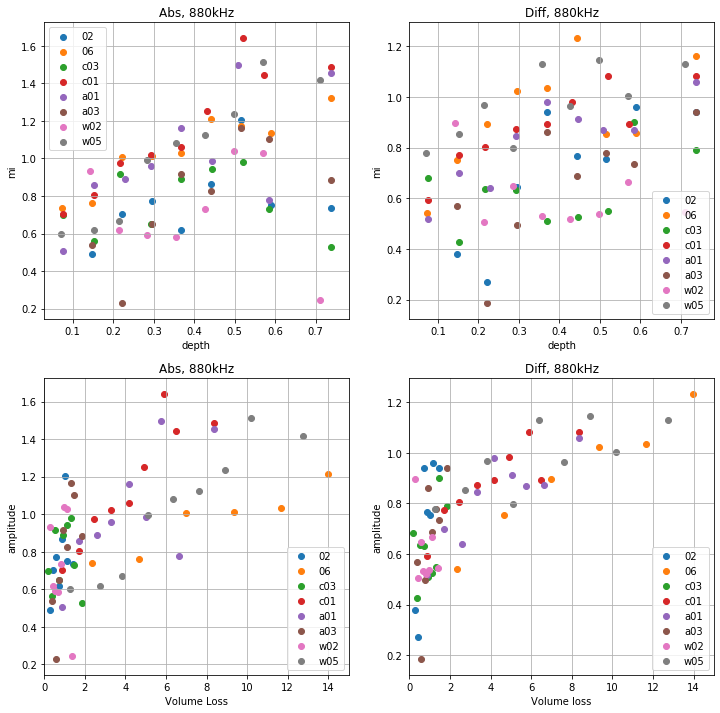

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(12 ,12))

#ax[0,0].set_ylim(0, 1500)
ax[0,0].scatter(round_pits02.Flaw_Depth, round_pits02.midr_X12, label='02')
ax[0,0].scatter(round_pits06.Flaw_Depth, round_pits06.midr_X12, label='06')
ax[0,0].scatter(circ_pits03.Flaw_Depth, circ_pits03.midr_X12, label='c03')
ax[0,0].scatter(circ_pits01.Flaw_Depth, circ_pits01.midr_X12, label='c01')
ax[0,0].scatter(axial_pits01.Flaw_Depth, axial_pits01.midr_X12, label='a01')
ax[0,0].scatter(axial_pits03.Flaw_Depth, axial_pits03.midr_X12, label='a03')
ax[0,0].scatter(weld_pits02.Flaw_Depth, weld_pits02.midr_X12, label='w02')
ax[0,0].scatter(weld_pits05.Flaw_Depth, weld_pits05.midr_X12, label='w05')

ax[0,0].set_title('Abs, 880kHz' )
ax[0,0].set(xlabel='depth', ylabel='mi')
ax[0,0].legend()
ax[0,0].grid()

#ax[0,1].set_ylim(0, 1500)
ax[0,1].scatter(round_pits02.Flaw_Depth, round_pits02.midr_Y12, label='02')
ax[0,1].scatter(round_pits06.Flaw_Depth, round_pits06.midr_Y12, label='06')
ax[0,1].scatter(circ_pits03.Flaw_Depth, circ_pits03.midr_Y12, label='c03')
ax[0,1].scatter(circ_pits01.Flaw_Depth, circ_pits01.midr_Y12, label='c01')
ax[0,1].scatter(axial_pits01.Flaw_Depth, axial_pits01.midr_Y12, label='a01')
ax[0,1].scatter(axial_pits03.Flaw_Depth, axial_pits03.midr_Y12, label='a03')
ax[0,1].scatter(weld_pits02.Flaw_Depth, weld_pits02.midr_Y12, label='w02')
ax[0,1].scatter(weld_pits05.Flaw_Depth, weld_pits05.midr_Y12, label='w05')
ax[0,1].set_title('Diff, 880kHz' )
ax[0,1].set(xlabel='depth', ylabel='mi')
ax[0,1].legend()
ax[0,1].grid()

ax[1,0].set_xlim(0, 15)
ax[1,0].scatter(round_pits02.Flaw_Volume, round_pits02.midr_X12, label='02')
ax[1,0].scatter(round_pits06.Flaw_Volume, round_pits06.midr_X12, label='06')
ax[1,0].scatter(circ_pits03.Flaw_Volume, circ_pits03.midr_X12, label='c03')
ax[1,0].scatter(circ_pits01.Flaw_Volume, circ_pits01.midr_X12, label='c01')
ax[1,0].scatter(axial_pits01.Flaw_Volume, axial_pits01.midr_X12, label='a01')
ax[1,0].scatter(axial_pits03.Flaw_Volume, axial_pits03.midr_X12, label='a03')
ax[1,0].scatter(weld_pits02.Flaw_Volume, weld_pits02.midr_X12, label='w02')
ax[1,0].scatter(weld_pits05.Flaw_Volume, weld_pits05.midr_X12, label='w05')
ax[1,0].set_title('Abs, 880kHz' )
ax[1,0].set(xlabel='Volume Loss', ylabel='amplitude')
ax[1,0].legend()
ax[1,0].grid()

ax[1,1].set_xlim(0, 15)
ax[1,1].scatter(round_pits02.Flaw_Volume, round_pits02.midr_Y12, label='02')
ax[1,1].scatter(round_pits06.Flaw_Volume, round_pits06.midr_Y12, label='06')
ax[1,1].scatter(circ_pits03.Flaw_Volume, circ_pits03.midr_Y12, label='c03')
ax[1,1].scatter(circ_pits01.Flaw_Volume, circ_pits01.midr_Y12, label='c01')
ax[1,1].scatter(axial_pits01.Flaw_Volume, axial_pits01.midr_Y12, label='a01')
ax[1,1].scatter(axial_pits03.Flaw_Volume, axial_pits03.midr_Y12, label='a03')
ax[1,1].scatter(weld_pits02.Flaw_Volume, weld_pits02.midr_Y12, label='w02')
ax[1,1].scatter(weld_pits05.Flaw_Volume, weld_pits05.midr_Y12, label='w05')
ax[1,1].set_title('Diff, 880kHz' )
ax[1,1].set(xlabel='Volume loss', ylabel='amplitude')
ax[1,1].legend()
ax[1,1].grid()

plt.show

## Summary of potentially useful Mutual Information Features: 

naming scheme for features:  
mi: 'mutual information
dr: differential real 
di: differential imaginary
ar: absolute real 
ai: 

1) using absolute mutual information:

depth correlation:
midr_X12
midr_Y12
midr_X18
midr_X18
midr_X04

midi_X12
midi_Y12
midi_X18
midi_Y18
midi_X04
miar_X11
miar_Y11

Volume correlation:

miar_X11
miar_Y11
miar_X12
miar_Y12
miar_X17
miar_Y17
miar_X18
miar_Y18